## Análise de dados de exportação de produtos em território nacional
### Neste pequeno projeto buscaremos entender qual foi a categoria que gerou maior valor de exportação ao longo do tempo, e também que estado possui o valor mais significátivo em exportações. 

In [83]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [84]:
df_exp = pd.read_csv('EXP_1997_2022_20230123.csv', sep=';')
df_exp.head()

,Ano,UF do Município,Codigo SH2,Descrição SH2,Valor FOB (US$)
0,2022,Rio de Janeiro,27,"Combustíveis minerais, óleos minerais e produt...",38311578603
1,2022,Pará,26,"Minerios, escórias e cinzas",14717216258
2,2022,Mato Grosso,12,"Sementes e frutos oleaginosos; grãos, sementes...",13802720637
3,2022,Minas Gerais,26,"Minerios, escórias e cinzas",10874431643
4,2022,São Paulo,27,"Combustíveis minerais, óleos minerais e produt...",10720989567


In [85]:
df_exp.tail()

,Ano,UF do Município,Codigo SH2,Descrição SH2,Valor FOB (US$)
42076,1997,Santa Catarina,75,Níquel e suas obras,22
42077,1997,Amazonas,59,"Tecidos impregnados, revestidos, recobertos ou...",12
42078,1997,Ceará,81,Outros metais comuns; ceramais (cermets); obra...,9
42079,1997,Santa Catarina,45,Cortiça e suas obras,9
42080,1997,Santa Catarina,37,Produtos para fotografia e cinematografia,9


In [86]:
df_exp['Ano'] = df_exp['Ano'].sort_values(ascending = True)
df_exp.tail()

,Ano,UF do Município,Codigo SH2,Descrição SH2,Valor FOB (US$)
42076,1997,Santa Catarina,75,Níquel e suas obras,22
42077,1997,Amazonas,59,"Tecidos impregnados, revestidos, recobertos ou...",12
42078,1997,Ceará,81,Outros metais comuns; ceramais (cermets); obra...,9
42079,1997,Santa Catarina,45,Cortiça e suas obras,9
42080,1997,Santa Catarina,37,Produtos para fotografia e cinematografia,9


In [87]:
df_exp.shape

(42081, 5)

In [88]:
df_exp.dtypes

Ano                 int64
UF do Município    object
Codigo SH2          int64
Descrição SH2      object
Valor FOB (US$)     int64
dtype: object

In [89]:
df_exp.columns

Index(['Ano', 'UF do Município', 'Codigo SH2', 'Descrição SH2',
       'Valor FOB (US$)'],
      dtype='object')

In [90]:
df_exp['UF do Município'].unique()

array(['Rio de Janeiro', 'Pará', 'Mato Grosso', 'Minas Gerais',
       'São Paulo', 'Santa Catarina', 'Goiás', 'Paraná', 'Bahia',
       'Rio Grande do Sul', 'Espírito Santo', 'Maranhão', 'Tocantins',
       'Pernambuco', 'Mato Grosso do Sul', 'Ceará', 'Piauí', 'Rondônia',
       'Alagoas', 'Amazonas', 'Rio Grande do Norte', 'Paraíba', 'Roraima',
       'Amapá', 'Sergipe', 'Distrito Federal', 'Acre', 'Exterior',
       'Não Declarada'], dtype=object)

In [91]:
df_exp.isna().sum()

Ano                0
UF do Município    0
Codigo SH2         0
Descrição SH2      0
Valor FOB (US$)    0
dtype: int64

In [92]:
#Criando uma coluna com o nome do estado
states_dict = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapá': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceará': 'CE',
    'Distrito Federal': 'DF',
    'Espírito Santo': 'ES',
    'Goiás': 'GO',
    'Maranhão': 'MA',
    'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS',
    'Minas Gerais': 'MG',
    'Pará': 'PA',
    'Paraíba': 'PB',
    'Paraná': 'PR',
    'Pernambuco': 'PE',
    'Piauí': 'PI',
    'Rio de Janeiro': 'RJ',
    'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'São Paulo': 'SP',
    'Sergipe': 'SE',
    'Tocantins': 'TO'
}


def map_states(df, states_dict):
    df = df.assign(UF=df['UF do Município'].map(states_dict))
    return df

df_exp = map_states(df_exp, states_dict)


In [94]:
df_exp

,Ano,UF do Município,Codigo SH2,Descrição SH2,Valor FOB (US$),UF
0,2022,Rio de Janeiro,27,"Combustíveis minerais, óleos minerais e produt...",38311578603,RJ
1,2022,Pará,26,"Minerios, escórias e cinzas",14717216258,PA
2,2022,Mato Grosso,12,"Sementes e frutos oleaginosos; grãos, sementes...",13802720637,MT
3,2022,Minas Gerais,26,"Minerios, escórias e cinzas",10874431643,MG
4,2022,São Paulo,27,"Combustíveis minerais, óleos minerais e produt...",10720989567,SP
...,...,...,...,...,...,...
42076,1997,Santa Catarina,75,Níquel e suas obras,22,SC
42077,1997,Amazonas,59,"Tecidos impregnados, revestidos, recobertos ou...",12,AM
42078,1997,Ceará,81,Outros metais comuns; ceramais (cermets); obra...,9,CE
42079,1997,Santa Catarina,45,Cortiça e suas obras,9,SC


In [96]:
#Como vimos acima na coluna UF do município há valores extras que não serão relevantes na nossa análise já que iremos focar
# apenas nos estados
df_exp.isna().sum()

Ano                  0
UF do Município      0
Codigo SH2           0
Descrição SH2        0
Valor FOB (US$)      0
UF                 311
dtype: int64

In [97]:
df_exp = df_exp.dropna()

In [98]:
df_exp.isna().sum()
df_exp

,Ano,UF do Município,Codigo SH2,Descrição SH2,Valor FOB (US$),UF
0,2022,Rio de Janeiro,27,"Combustíveis minerais, óleos minerais e produt...",38311578603,RJ
1,2022,Pará,26,"Minerios, escórias e cinzas",14717216258,PA
2,2022,Mato Grosso,12,"Sementes e frutos oleaginosos; grãos, sementes...",13802720637,MT
3,2022,Minas Gerais,26,"Minerios, escórias e cinzas",10874431643,MG
4,2022,São Paulo,27,"Combustíveis minerais, óleos minerais e produt...",10720989567,SP
...,...,...,...,...,...,...
42076,1997,Santa Catarina,75,Níquel e suas obras,22,SC
42077,1997,Amazonas,59,"Tecidos impregnados, revestidos, recobertos ou...",12,AM
42078,1997,Ceará,81,Outros metais comuns; ceramais (cermets); obra...,9,CE
42079,1997,Santa Catarina,45,Cortiça e suas obras,9,SC


In [107]:
cols_rename = {'Ano': 'Ano', 'UF do Município' : 'UF', 'Codigo SH2':'SH2', 
              'Descrição SH2': 'Descrição', 'Valor FOB (US$)' : 'Exportação', 'UF': 'UF_Code'}
df_exp = df_exp.rename(columns=cols_rename)

In [121]:
exp_year = df_exp.groupby(['Ano', 'UF_Code']).sum().reset_index()
exp_year.drop(columns='SH2')

,Ano,UF_Code,Exportação
0,1997,AC,213876
1,1997,AL,316804697
2,1997,AM,198738603
3,1997,AP,49221101
4,1997,BA,1871885377
...,...,...,...
697,2022,RS,20966606722
698,2022,SC,14385468631
699,2022,SE,127475418
700,2022,SP,74369830651


In [132]:
exp_year['UF_Code'].unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

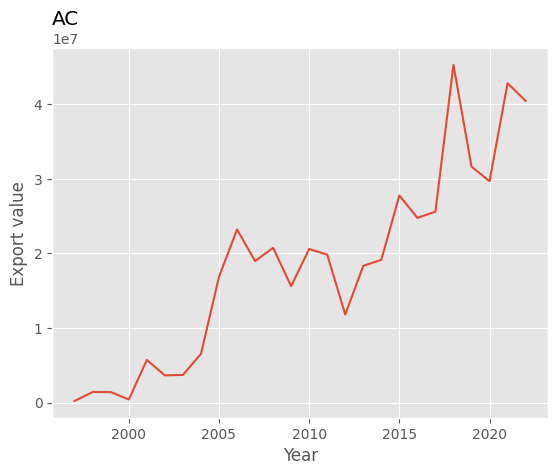

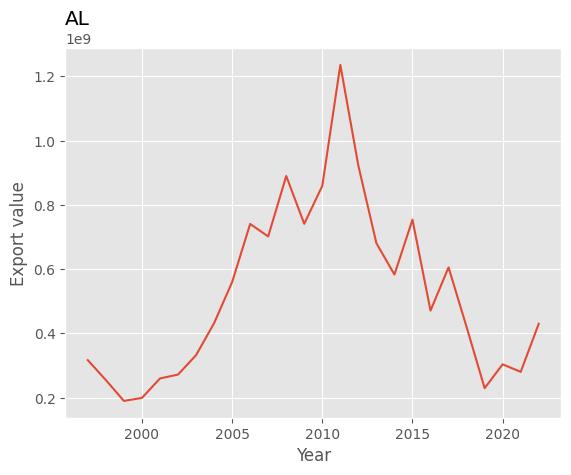

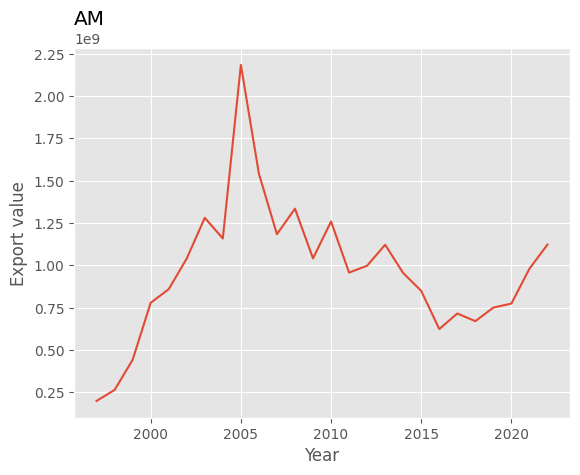

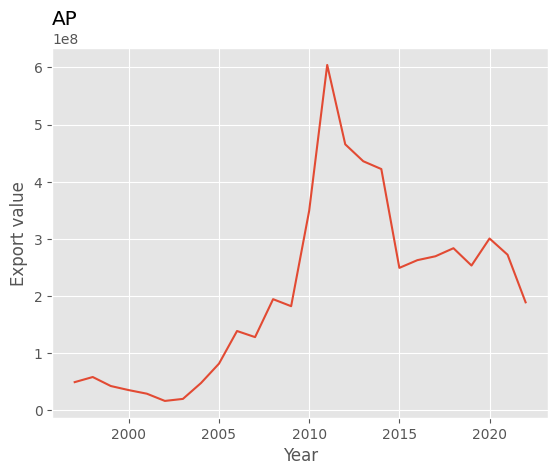

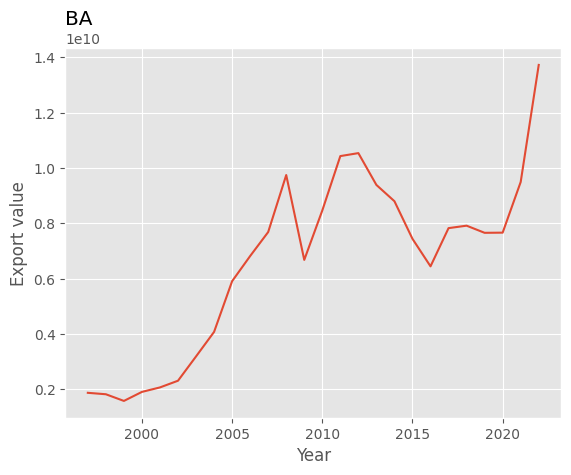

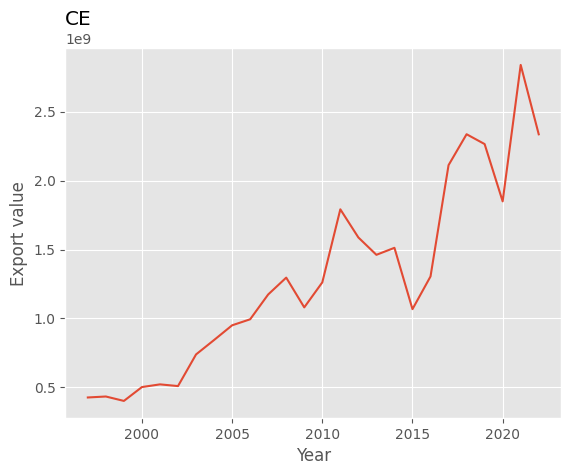

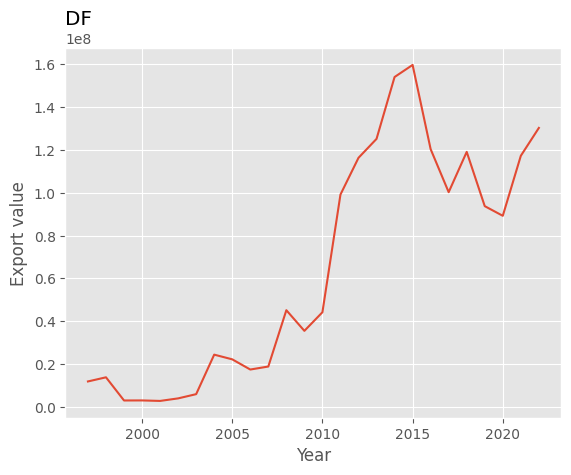

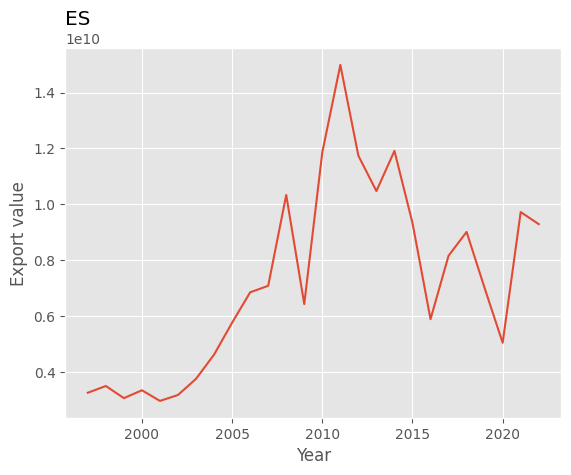

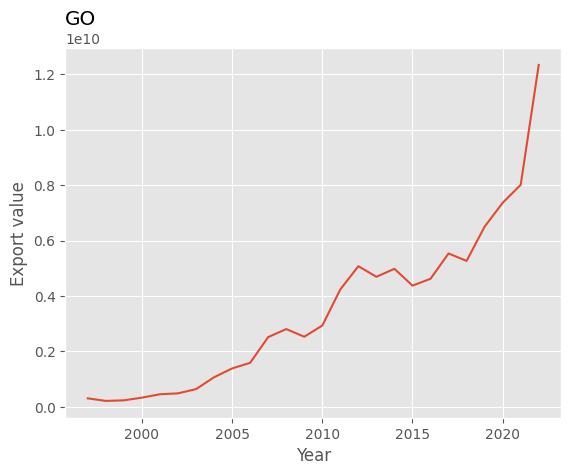

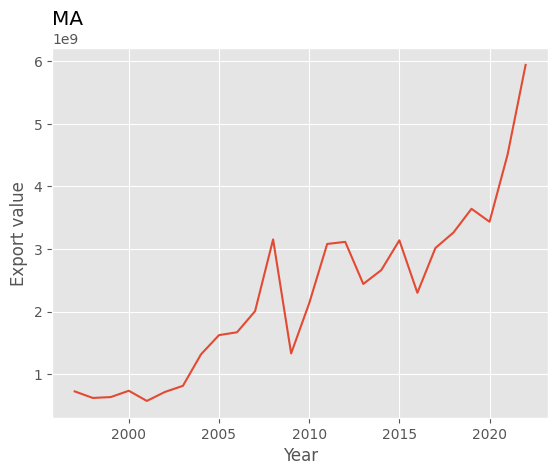

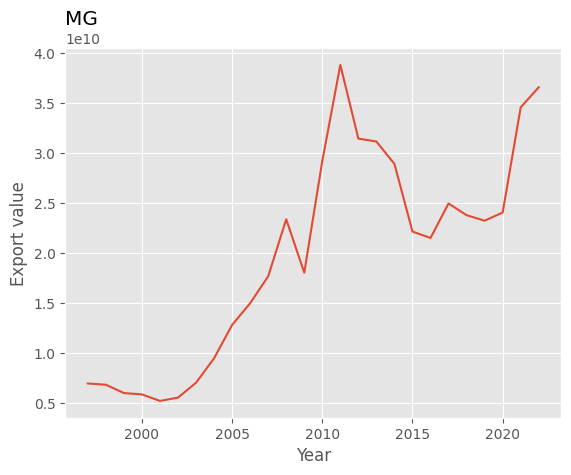

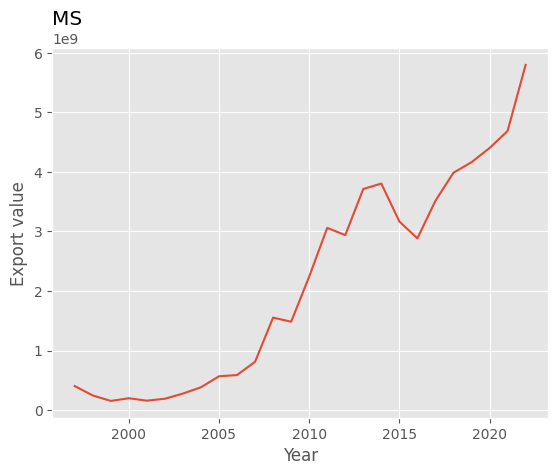

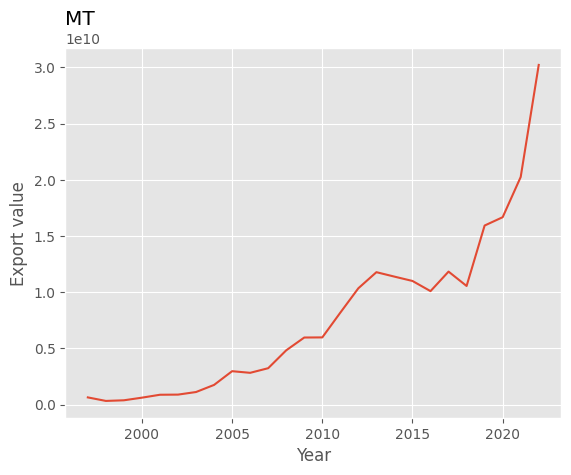

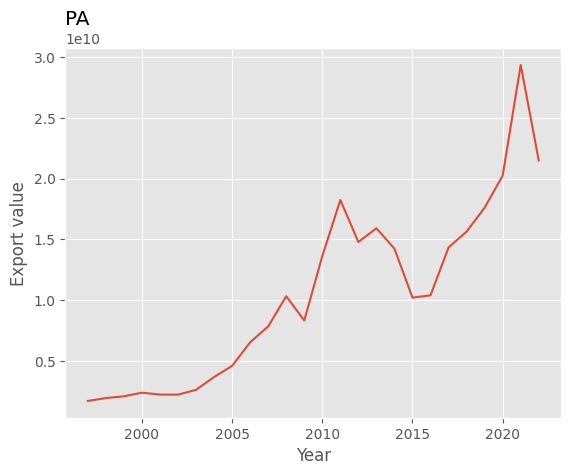

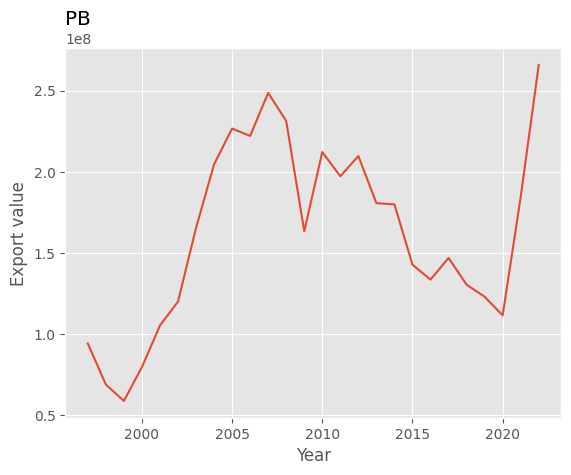

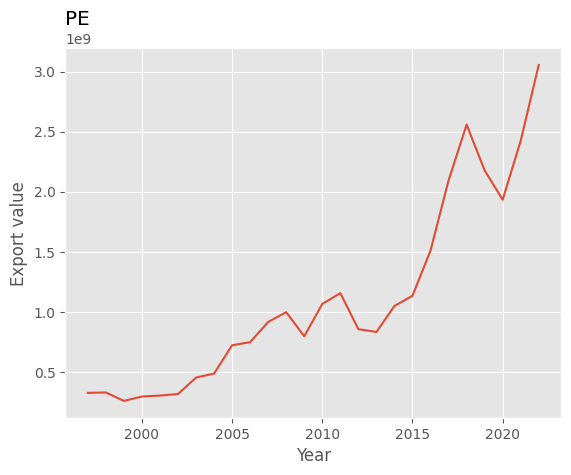

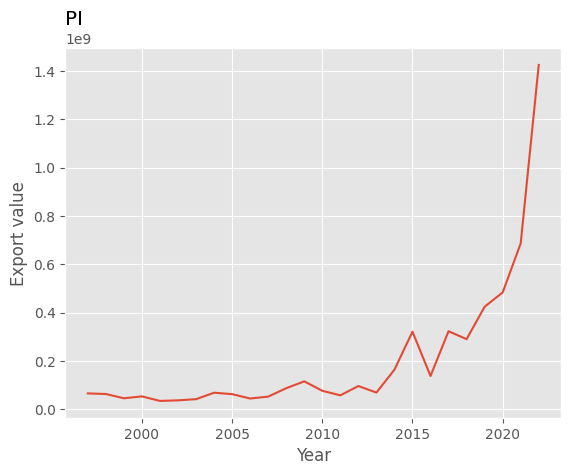

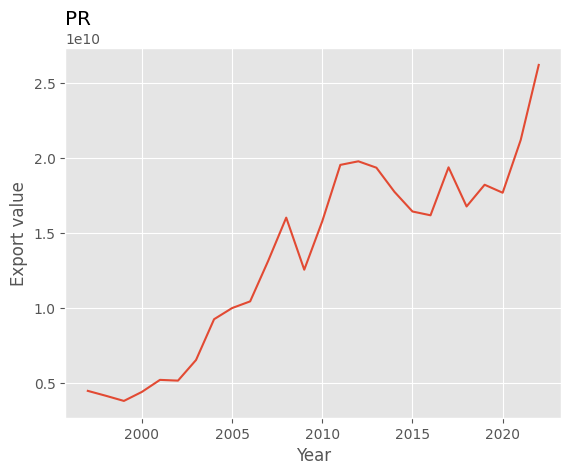

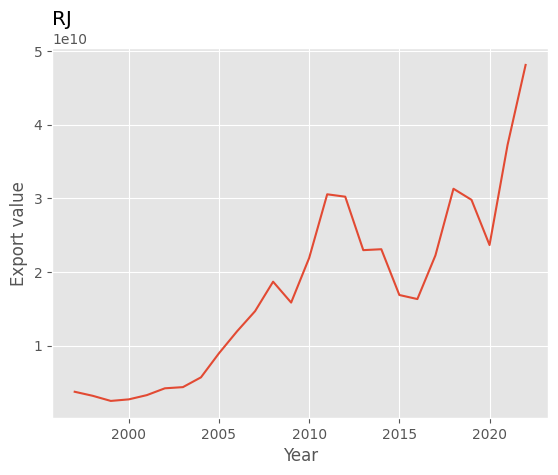

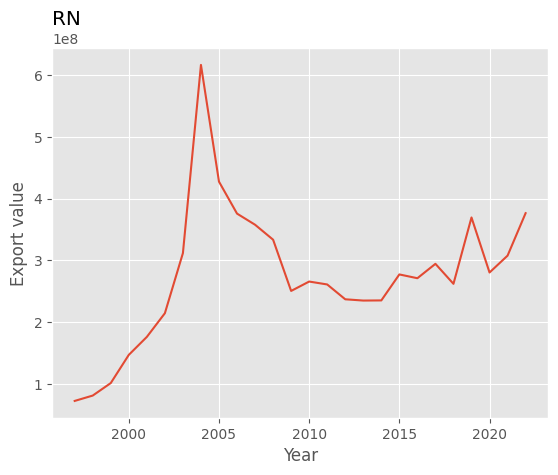

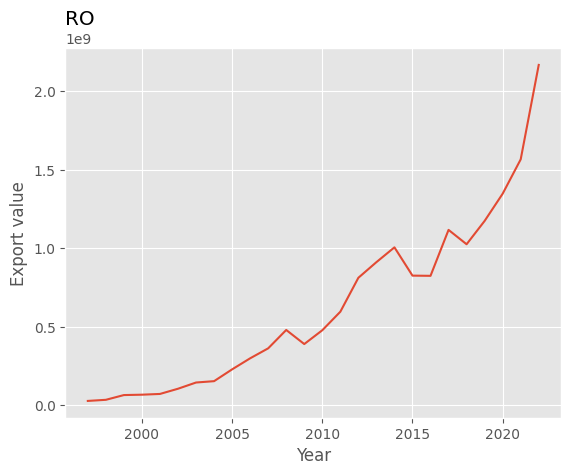

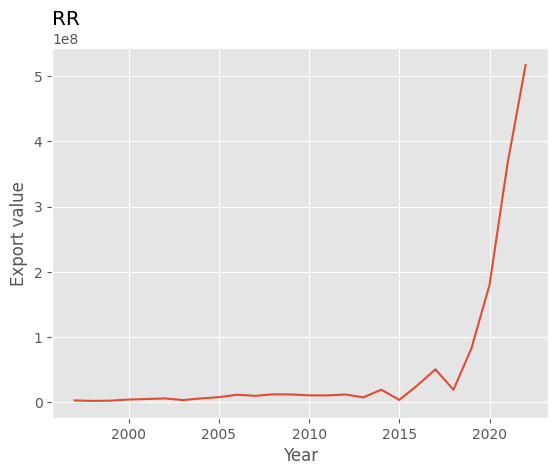

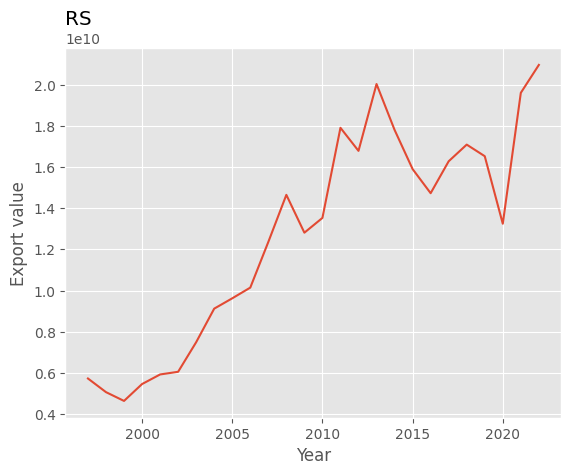

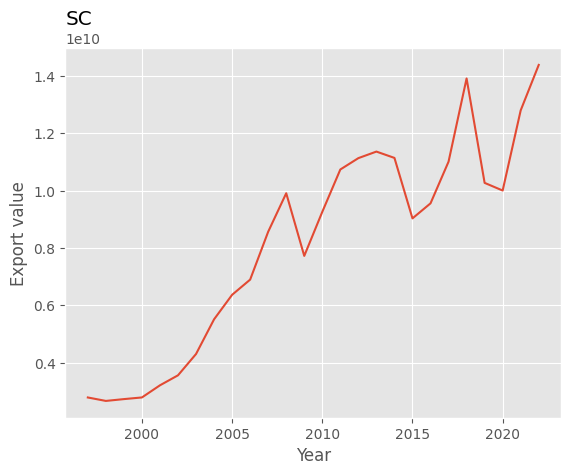

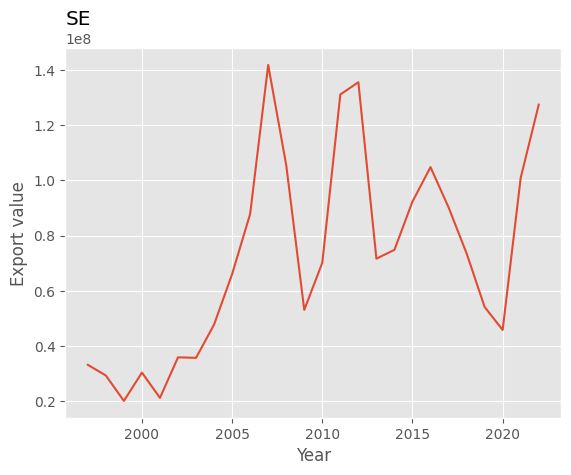

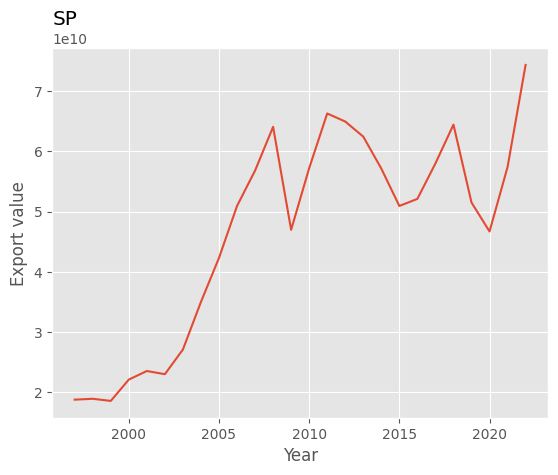

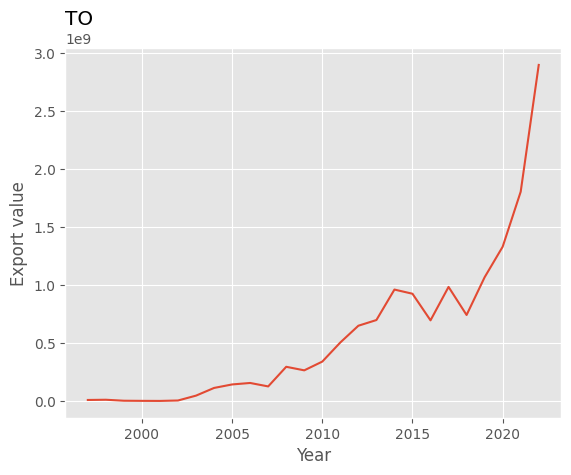

In [136]:
estado = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO']

for state in estado: 
    state_df = exp_year[exp_year['UF_Code'] == state]

    sns.lineplot(x='Ano', y='Exportação', data=state_df, ci=None)
    plt.xlabel('Year')
    plt.ylabel('Export value')
    plt.title(state, loc='left')
    plt.show()

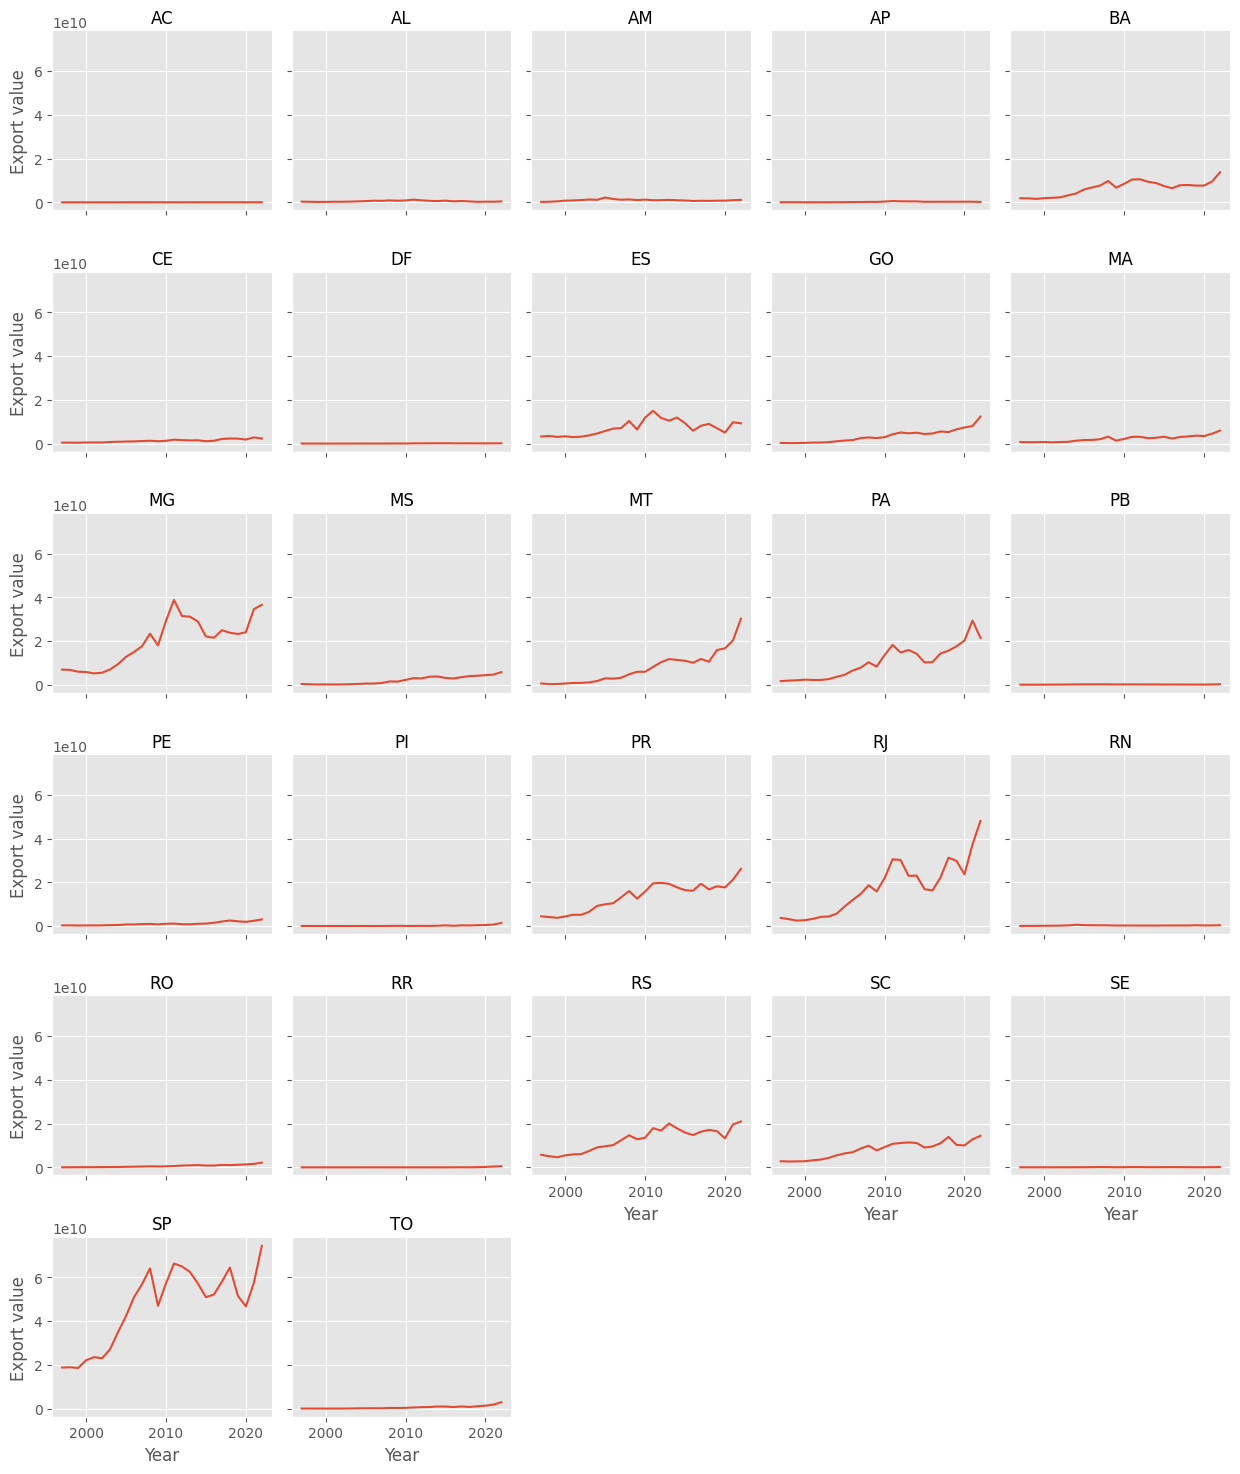

In [148]:
import seaborn as sns
g = sns.FacetGrid(exp_year, col='UF_Code', col_wrap=5, height=2.5)

g.map(sns.lineplot, 'Ano', 'Exportação', ci=None)

# Configurar os eixos e títulos
g.set_xlabels('Year')
g.set_ylabels('Export value')
g.set_titles('{col_name}')

plt.show()


## Podemos notar que alguns estados possuem um valor de exportação muito inferior em relação a outros, por exemplo: Se compararmos São Paulo com Tocantins a diferença é gigantesca. Isso é devido a uma série de fatores econômicos que levaram o desenvolvimento de São Paulo como o principal estado exportador

In [185]:
Prod_Lider_df = df_exp.query('SH2 == 12')
Prod_Lider_df.iloc[0, 3]

'Sementes e frutos oleaginosos; grãos, sementes e frutos diversos; plantas industriais ou medicinais; palhas e forragens'

In [189]:
ano = [2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
       2000, 1999, 1998, 1997]

for Year in ano: 
    Prod_Lider = df_exp.query('Ano == @Year').groupby('SH2')['Exportação'].sum().sort_values(ascending=False).head(1)
    Categoria = Prod_Lider.index[0]
    print('O produto líder em', Year, 'foi:', Categoria)
    Prod_Lider_df = df_exp.query('SH2 == @Categoria')
    Prod_Lider_df=Prod_Lider_df.iloc[0,3]
    print("O produto líder é pertencente da categoria:", Prod_Lider_df)
    print('')

O produto líder em 2022 foi: 27
O produto líder é pertencente da categoria: Combustíveis minerais, óleos minerais e produtos da sua destilação; matérias betuminosas; ceras minerais

O produto líder em 2021 foi: 26
O produto líder é pertencente da categoria: Minerios, escórias e cinzas

O produto líder em 2020 foi: 12
O produto líder é pertencente da categoria: Sementes e frutos oleaginosos; grãos, sementes e frutos diversos; plantas industriais ou medicinais; palhas e forragens

O produto líder em 2019 foi: 27
O produto líder é pertencente da categoria: Combustíveis minerais, óleos minerais e produtos da sua destilação; matérias betuminosas; ceras minerais

O produto líder em 2018 foi: 12
O produto líder é pertencente da categoria: Sementes e frutos oleaginosos; grãos, sementes e frutos diversos; plantas industriais ou medicinais; palhas e forragens

O produto líder em 2017 foi: 12
O produto líder é pertencente da categoria: Sementes e frutos oleaginosos; grãos, sementes e frutos diver

In [203]:
for year in ano:
    df_anual = df_exp.query("Ano == @ano")

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
       2000, 1999, 1998, 1997], dtype=int64)

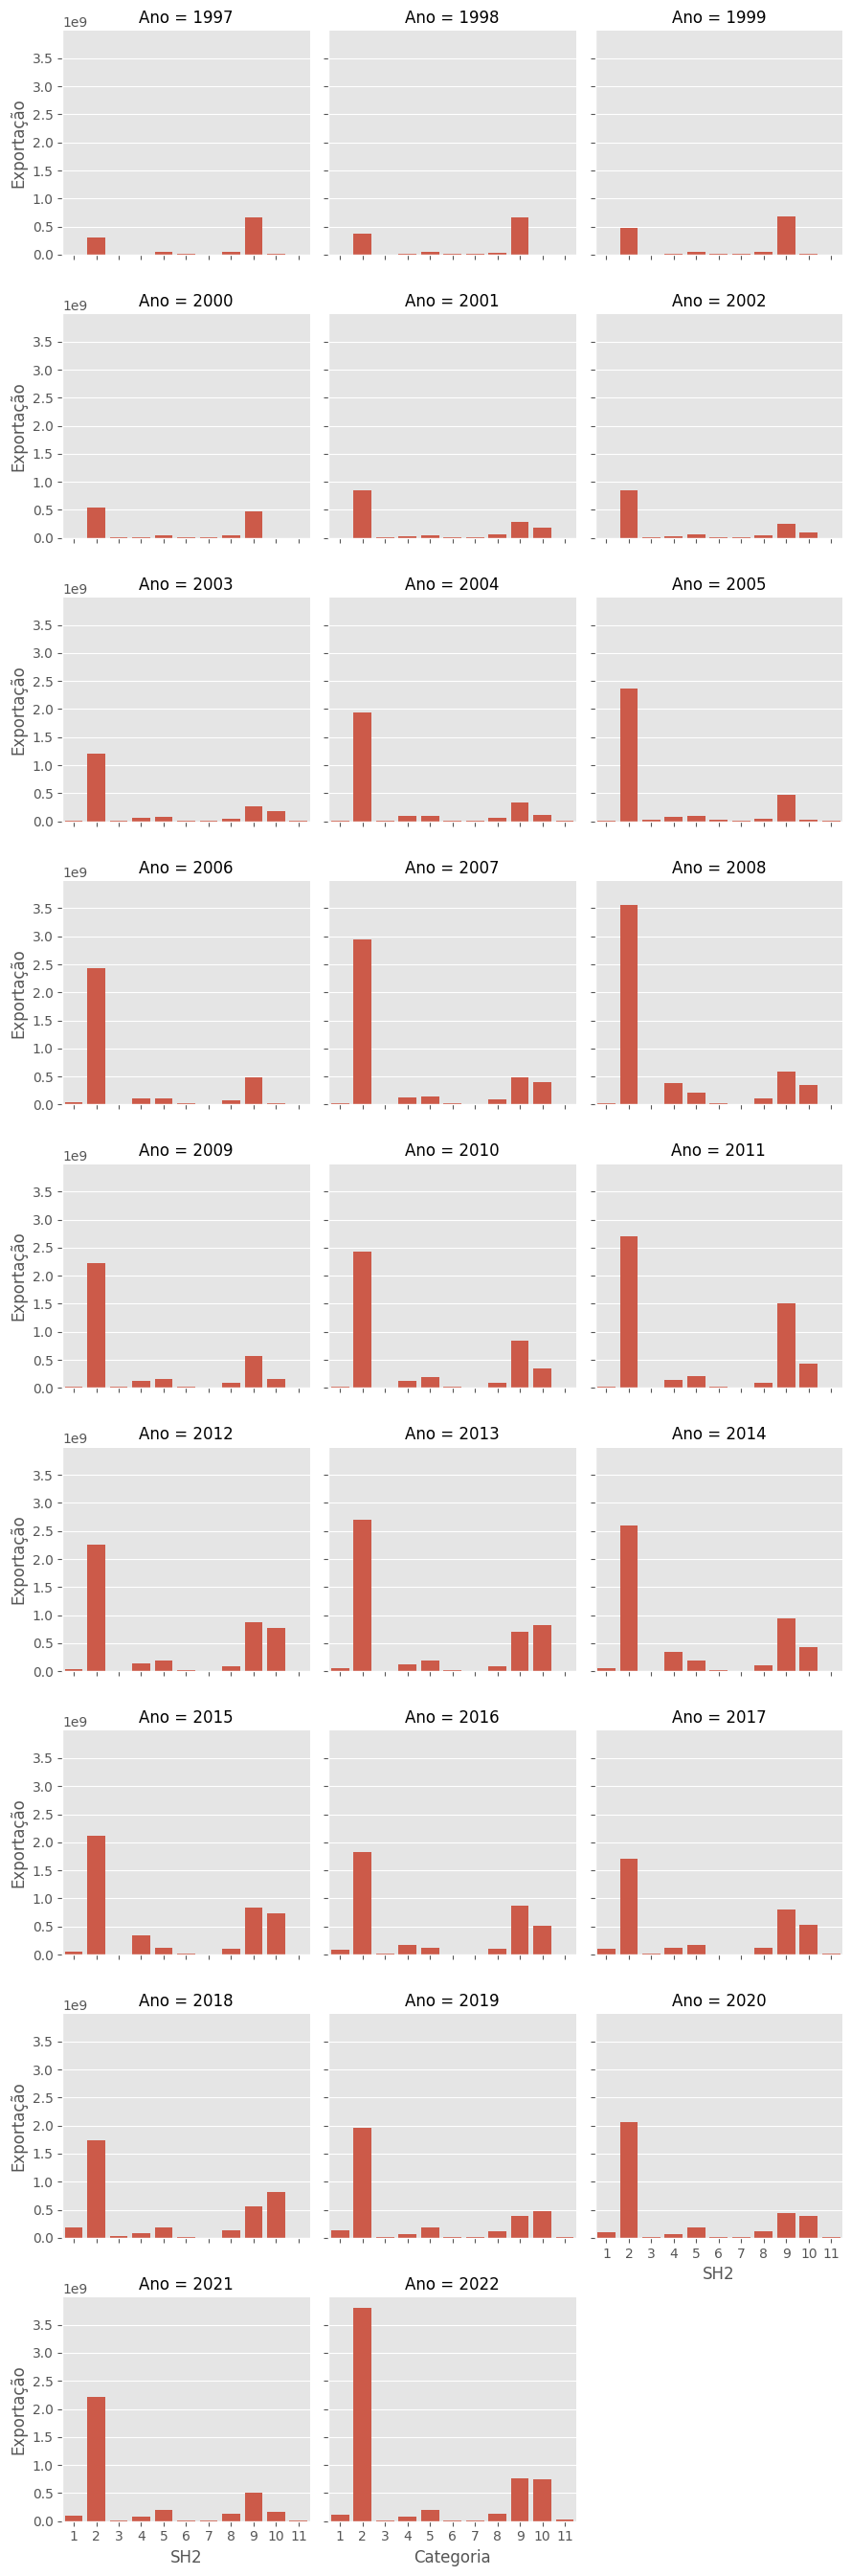

In [218]:
df_sp = df_exp.query('UF_Code == "SP"')

# Agrupar os dados por 'SH2', 'ano' e 'UF_Code' e calcular a soma das exportações
exp_sp = df_sp.groupby(['SH2', 'Ano'])['Exportação'].sum().reset_index()
exp_sp = exp_sp.head(300)
# Criar o gráfico de barra
g = sns.FacetGrid(exp_sp, col="Ano", col_wrap=3)
g.map(sns.barplot, "SH2", "Exportação")

# Configurar os eixos e títulos
plt.xlabel('Categoria')
plt.ylabel('Export value')

plt.show()